**College Dorm Review Sentiment Analysis & Prediction**


**Web-Scraping**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr

db = pd.read_csv('StudentReviews - StudentReviews.csv')

**EDA on our Dataset**

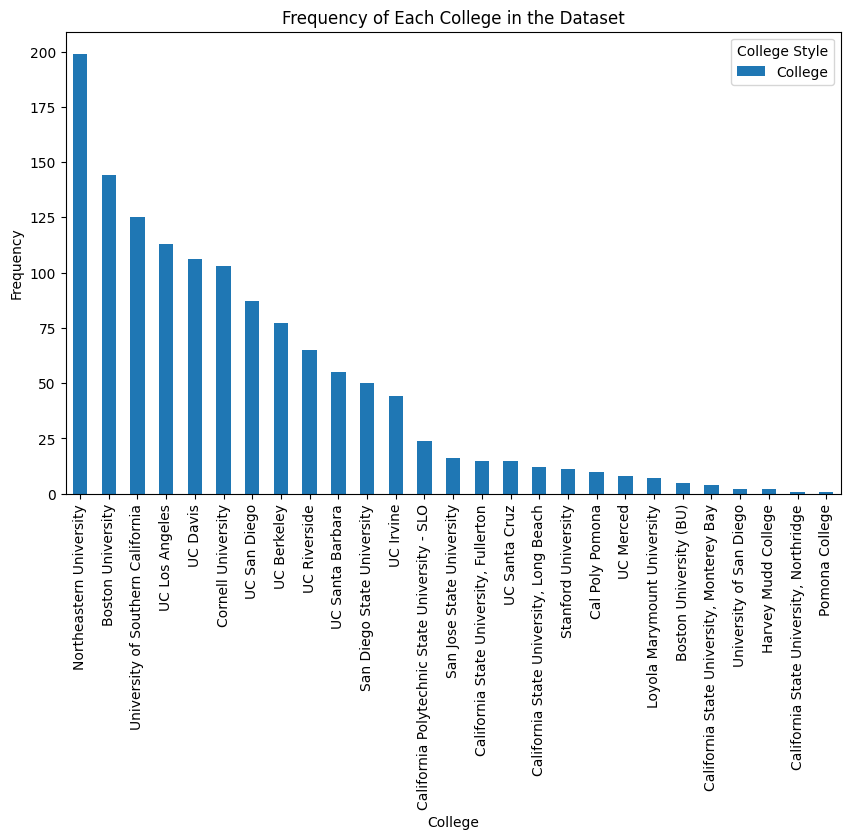

In [ ]:
college_counts = db['College'].value_counts()

# Plotting the stacked bar graph
fig, ax = plt.subplots(figsize=(10, 6))
df_college_counts = db['College'].value_counts().loc[college_counts.index]
df_college_counts.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Frequency of Each College in the Dataset')
ax.set_xlabel('College')
ax.set_ylabel('Frequency')
ax.legend(title='College Style')

plt.show()

**Explanation**: This is the bar graph showing the frequency of colleges used in this data set. This is important to show that our data is not biased to a specific region or college in the California or the east coast. We have a diverse dataset of many Universities in California, and many Ivy League Universities on the east coast.

<ipython-input-43-ac859d8a8f16>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_ratings = db.groupby(['College', 'Style']).mean().reset_index()


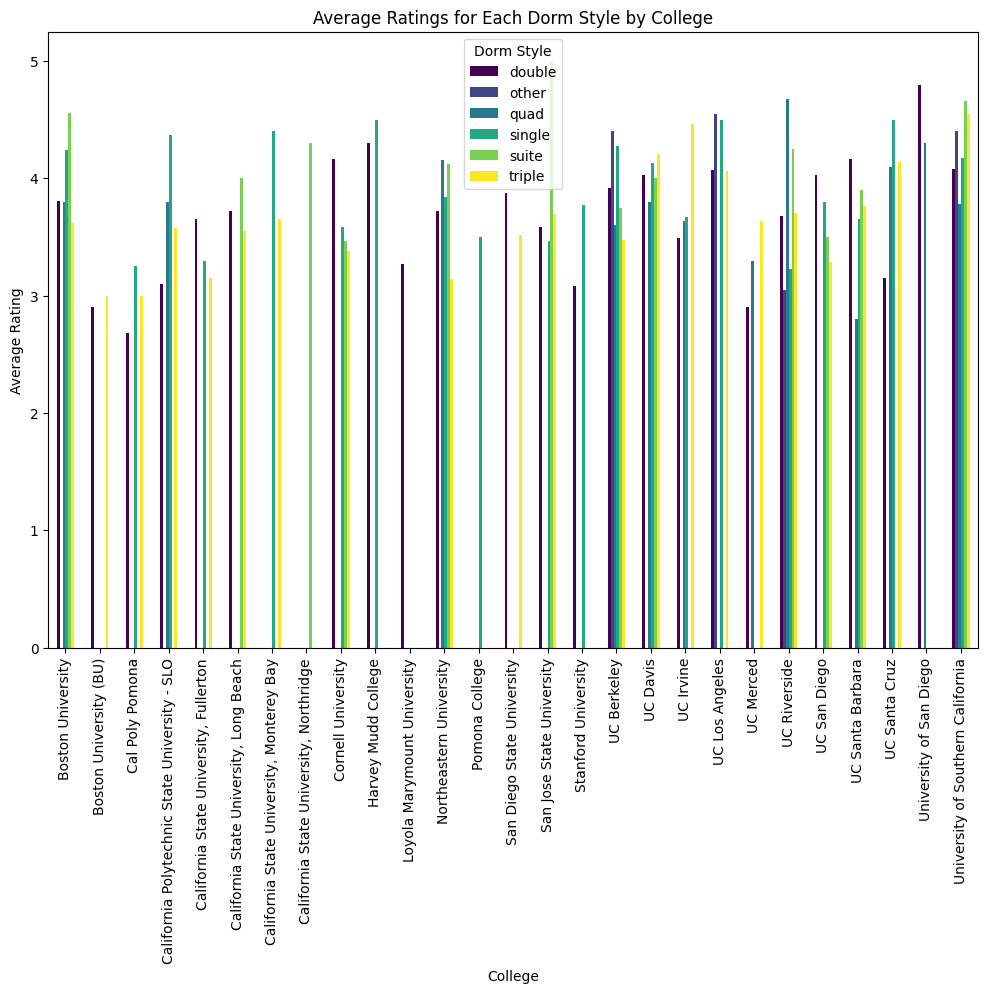

In [ ]:
avg_ratings = db.groupby(['College', 'Style']).mean().reset_index()

# Pivot the data for plotting
pivot_data = avg_ratings.pivot(index='College', columns='Style', values='AvgReview')

# Plot the data
pivot_data.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Average Ratings for Each Dorm Style by College')
plt.xlabel('College')
plt.ylabel('Average Rating')
plt.legend(title='Dorm Style')
plt.show()

**Explanation**: These are the average ratings for each dorm style based on the college. We can see that all the average ratings are similar across the dorm styles. Therefore, the dorm style does not have much to do with a specific dorm style. A double dorm (for 2 people) has just enough of a chance as a triple (for 3 people) to be a suitable dorm for college students. Also the college you go to doesn't seem to factor into the average rating for each dorm style. Therefore, there is no bias in our dataset that would skew our results based on the specific college someone attends. Intuitively the higher tuition to attend the college, responds to a higher quality of dorms.

In [ ]:

style_mapping = {'single': 1, 'double': 2, 'triple': 3, 'quad': 4, 'suite': 5, 'other': 5}
db['Style Num'] = db['Style'].map(style_mapping)

db

,College,Community,Style,RoomReview,BldReview,LocReview,BathReview,AvgReview,Comment,Style Num
0,UC Riverside,Pentland Hills,triple,4,4,2,4,3.5,everyone here keeps to themselves. halls are s...,3.0
1,UC Riverside,Pentland Hills,suite,4,3,4,5,4.0,honestly it was a nice place to live as a firs...,5.0
2,UC Riverside,Pentland Hills,double,3,4,4,4,3.8,it's hard to be social as the dorms are suite ...,2.0
3,UC Riverside,Pentland Hills,double,5,3,5,4,4.3,pentland hills is a good dorm building because...,2.0
4,UC Riverside,Pentland Hills,triple,4,4,4,5,4.3,i liked having private bathrooms and it was pr...,3.0
...,...,...,...,...,...,...,...,...,...,...
1296,Cornell University,Mews Hall,double,5,5,4,4,4.5,the rooms are very nice and clean. the cleanli...,2.0
1297,Cornell University,Mews Hall,double,5,4,5,4,4.5,definitely one of the best dorms. very close t...,2.0
1298,Cornell University,112 Edgemoor,single,5,2,4,2,3.3,the rooms are all singles but they're pretty h...,1.0
1299,Cornell University,112 Edgemoor,single,3,2,4,2,2.8,"the dorm is an old three story house, so thier...",1.0


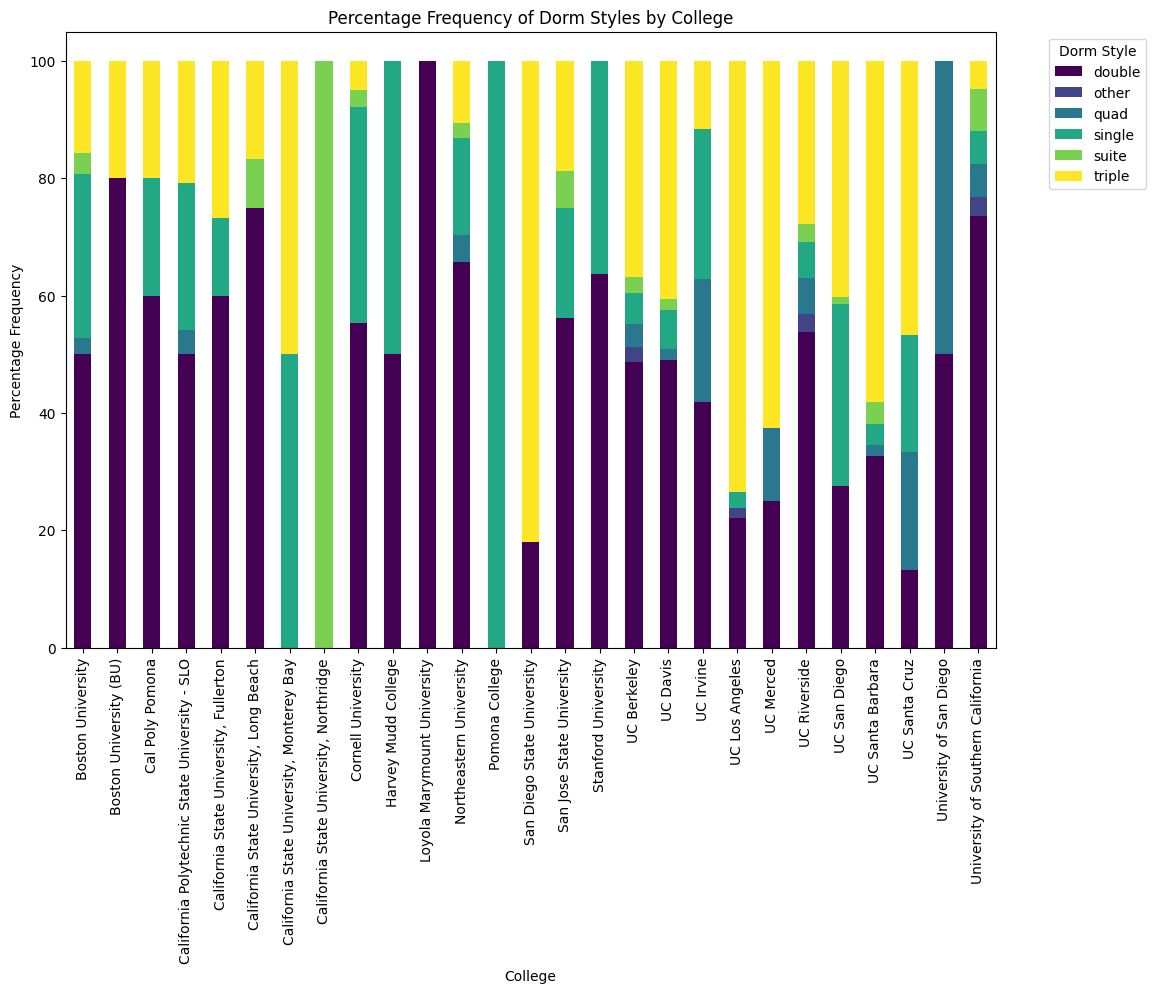

In [ ]:
styles_count = db.groupby(['College', 'Style']).size().unstack().fillna(0)

# Normalize to get percentage frequency
styles_percentage = styles_count.div(styles_count.sum(axis=1), axis=0) * 100

# Plot the data
ax = styles_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Percentage Frequency of Dorm Styles by College')
plt.xlabel('College')
plt.ylabel('Percentage Frequency')
plt.legend(title='Dorm Style', bbox_to_anchor=(1.05, 1), loc='upper left')

**Explanation**: This is a stacked bar graph showing the percentage frequency for all the Dorm styles for each college. We can see that majority of dorms from these colleges are singles and the 2nd most frequent dorm style is Triple. This is an important metric because we can see if the University's average dorm experience rating changes based on the distribution of the types of dorms that a university has. From the results we have seen, the means of dorm ratings across the multiple universities in our dataset do not deviate too much from the average. Therefore, we can argue that the dorm type/style does not correlate to a higher or lower average rating.

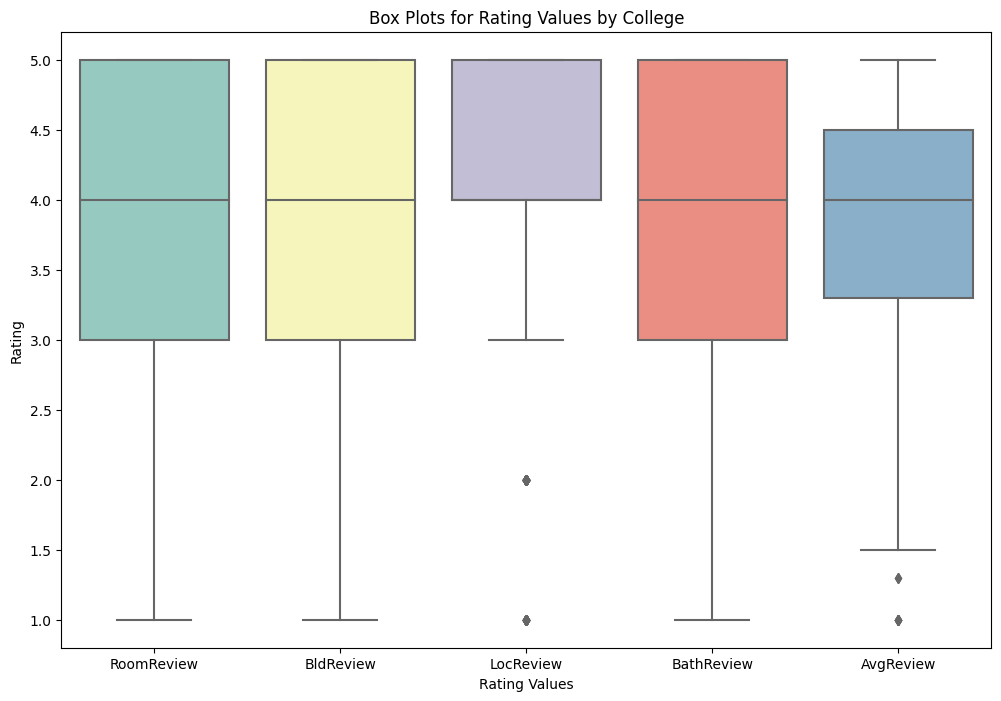

In [ ]:
melted_df = pd.melt(db, id_vars=['College'], value_vars=['RoomReview', 'BldReview', 'LocReview', 'BathReview', 'AvgReview'])

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=melted_df, palette='Set3')
plt.title('Box Plots for Rating Values by College')
plt.xlabel('Rating Values')
plt.ylabel('Rating')
plt.show()

**Explanation**: All the ratings have similar median values. The data for Location Review Ratings and Average Ratings are less spread out compared to the bathroom, room, and building ratings, but overall the distributions for these varaibles are relatively similar as we see a left skew for all of them. This is important to our study because the graph shows that no feature in our data skews the average score or a dorm. Each feature and rating is weighted equally which prevents our dataset and sentiment analysis to be skewed by a particular feature in the data set.

<ipython-input-47-93ef259f0614>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Style Num', y='AvgReview', data=db, ci=None, palette='viridis')


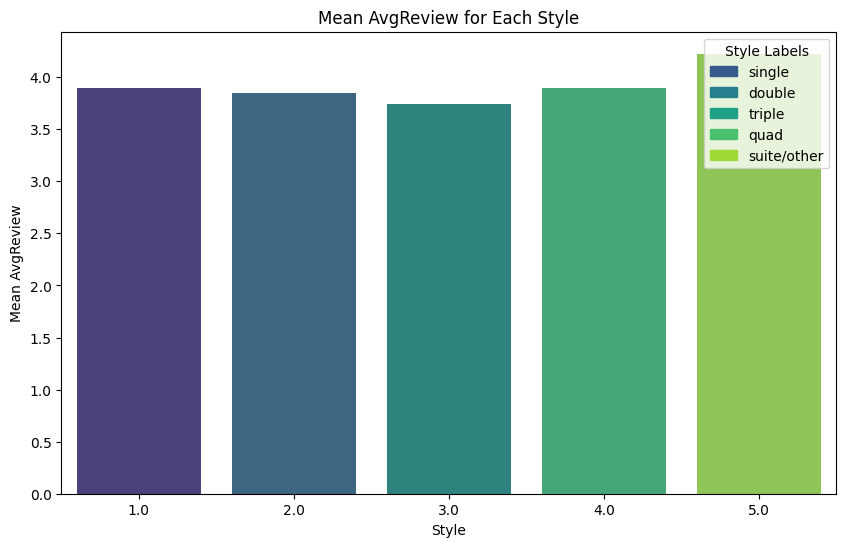

In [ ]:
# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Style Num', y='AvgReview', data=db, ci=None, palette='viridis')
plt.title('Mean AvgReview for Each Style')
plt.xlabel('Style')
plt.ylabel('Mean AvgReview')
legend_labels = {1: 'single', 2: 'double', 3: 'triple', 4: 'quad', 5: 'suite/other'}
handles = [plt.Rectangle((0, 0), 1, 1, color=sns.color_palette('viridis')[i], label=label) for i, label in legend_labels.items()]
plt.legend(handles=handles, title='Style Labels')
plt.show()

**Explanation**: The mean Average ratings are pretty similar across the board for each Dorm style. You do see a slight increase in average rating when you get to suite/other, but everything is very similar. As this bar graph shows, there does not appear to be much of a difference between the mean values of any style of dorm. They all appear to hover around 0. However once we look at the suites/other styles, there appers to be a slight increase in the mean sentiment score. The distribution of Sentiment Score for each dorm style is relatively normal, and the spread of the graphs are all similar. Therefore, we can argue that the dorm type/style does not correlate to a higher or lower average rating.

In [ ]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(db['BathReview'], db['BldReview'])
contingency_table
# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-squared value: {chi2:.2f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpret the results
alpha = 0.05
print("\nTest Result:")
if p < alpha:
    print("Reject the null hypothesis. There is a significant difference in distribution '\n' between Bathroom Review and Building Review.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in distribution between Bathroom Review and Building Review")

Chi-squared value: 696.90
P-value: 0.0000
Degrees of Freedom: 16
Expected Frequencies:
[[  2.65641814   7.62490392  16.0368947   20.11990776  17.56187548]
 [  6.80707148  19.5388163   41.09454266  51.55726364  45.00230592]
 [ 13.24058417  38.00538048  79.933897   100.28516526  87.5349731 ]
 [ 15.44043044  44.31975404  93.21445042 116.94696387 102.07840123]
 [ 15.85549577  45.51114527  95.72021522 120.09069946 104.82244427]]

Test Result:
Reject the null hypothesis. There is a significant difference in distribution '
' between Bathroom Review and Building Review.


**Explanation**: We did a chi-squared test to see if there is a difference in distribution between the Bathroom Review and Building Review rating. Since our chi-squared value was 696 with a degrees of Freedom of 16, 696 is greater than the critical value 26.2, we can say there is a difference in distribution between the Bathroom Review and Building Review.

**Text Mining Technique (Giving Each Dorm review a sentiment score to see how satisfactory a dorm was.) Bag-Of-Ngrams and Sentiment Analysis**
**Takes about 3 mins to run**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                 College       Community   Style  RoomReview  BldReview  \
0           UC Riverside  Pentland Hills  triple           4          4   
1           UC Riverside  Pentland Hills   suite           4          3   
2           UC Riverside  Pentland Hills  double           3          4   
3           UC Riverside  Pentland Hills  double           5          3   
4           UC Riverside  Pentland Hills  triple           4          4   
...                  ...             ...     ...         ...        ...   
1296  Cornell University       Mews Hall  double           5          5   
1297  Cornell University       Mews Hall  double           5          4   
1298  Cornell University    112 Edgemoor  single           5          2   
1299  Cornell University    112 Edgemoor  single           3          2   
1300  Cornell University    112 Edgemoor  single           1          1   

      LocReview  BathReview  AvgReview  \
0             2           4        3.5   
1             4

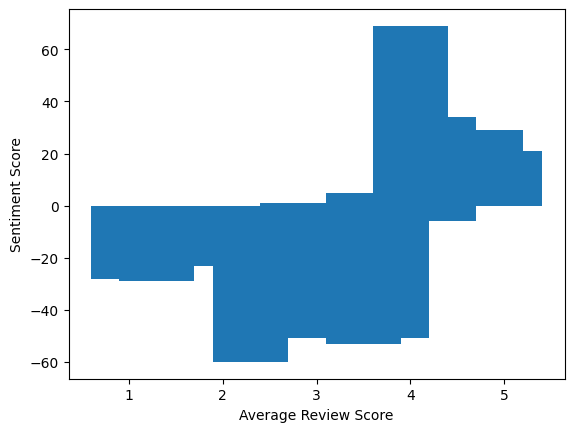

In [ ]:
import pandas as pd
import re
import nltk
nltk.download('punkt')
import string
import matplotlib.pyplot as plt
from nltk.util import ngrams
from collections import Counter


db = pd.read_csv('StudentReviews - StudentReviews.csv')
ratings = db['AvgReview']
negative = db[ratings < 4]
positive = db[ratings >= 4]
comments_negative = negative['Comment'].tolist()
comments_positive = positive['Comment'].tolist()
+
def get_ngrams(txt, n):
    n_grams = ngrams(nltk.word_tokenize(txt), n)
    return [' '.join(grams) for grams in n_grams]

comments_negative_1 = str(comments_negative)
comments_positive_1 = str(comments_positive)

def remove_punctuations(word_list_1):
    words = nltk.word_tokenize(word_list_1)
    punt_removed = [w for w in words if w.lower() not in string.punctuation]
    return " ".join(punt_removed)

comments_negative_1 = remove_punctuations(comments_negative_1)
trigrams_negative = get_ngrams(comments_negative_1,1)
trigrams_count_negative = Counter(trigrams_negative)
trigrams_freq_negative = pd.DataFrame.from_dict(trigrams_count_negative, orient='index')
trigrams_freq_negative = trigrams_freq_negative.rename(columns={'index':'words', 0:'frequency'})
trigrams_freq_negative = trigrams_freq_negative.sort_values(by='frequency', ascending=False).head(50)

comments_positive_1 = remove_punctuations(comments_positive_1)
trigrams_positive = get_ngrams(comments_positive_1,1)
trigrams_count_positive = Counter(trigrams_positive)
trigrams_freq_positive = pd.DataFrame.from_dict(trigrams_count_positive, orient='index')
trigrams_freq_positive = trigrams_freq_positive.rename(columns={'index':'words', 0:'frequency'})
trigrams_freq_positive = trigrams_freq_positive.sort_values(by='frequency', ascending=False).head(50)

terms_to_remove = set(trigrams_freq_negative.index).union(set(trigrams_freq_positive.index))

comments_negative_1 = ' '.join([word for word in comments_negative_1.split() if word not in terms_to_remove])
comments_positive_1 = ' '.join([word for word in comments_positive_1.split() if word not in terms_to_remove])

comments_negative_1 = remove_punctuations(comments_negative_1)
trigrams_negative = get_ngrams(comments_negative_1,3)
trigrams_count_negative = Counter(trigrams_negative)
trigrams_freq_negative = pd.DataFrame.from_dict(trigrams_count_negative, orient='index')
trigrams_freq_negative = trigrams_freq_negative.rename(columns={'index':'words', 0:'frequency'})
trigrams_freq_negative = trigrams_freq_negative.sort_values(by='frequency', ascending=False)

comments_positive_1 = remove_punctuations(comments_positive_1)
trigrams_positive = get_ngrams(comments_positive_1,3)
trigrams_count_positive = Counter(trigrams_positive)
trigrams_freq_positive = pd.DataFrame.from_dict(trigrams_count_positive, orient='index')
trigrams_freq_positive = trigrams_freq_positive.rename(columns={'index':'words', 0:'frequency'})
trigrams_freq_positive = trigrams_freq_positive.sort_values(by='frequency', ascending=False)

#print(trigrams_freq_negative.head(60))
#print(trigrams_freq_positive.head(60))

sentiScore = [0] * 1301
db["SentimentScore"] = sentiScore
db["SentimentScore"] = 0

for trigramCheck in trigrams_positive:
  trigramEscapedPos = re.escape(trigramCheck)
  db["SentimentScore"] += db["Comment"].str.contains(trigramEscapedPos, na = False).astype(int)

for trigramCheckTwo in trigrams_negative:
  trigramEscapedNeg = re.escape(trigramCheckTwo)
  db["SentimentScore"] -= db["Comment"].str.contains(trigramEscapedNeg, na = False).astype(int)

#db["SentimentScore"] /= len(db["Comment"])

print(db)

plt.bar(db["AvgReview"], db["SentimentScore"])
plt.xlabel("Average Review Score")
plt.ylabel("Sentiment Score")
plt.show()



**Explanation Pt 1 (Bag-of-N-Grams):**
In order to classify positive and negative reviews. We decided to use the bag-of-n-grams natural-language-processing technique to identify terms/phrases found in either positive or negative reviews. In our project, we went with a trigrams approach. Trigrams allows us to find the most common three-word-phrases, which is useful for reviews (ex “bathrooms are clean”).

First, we split the comments into two sets, one for comments attached to positive reviews and one for comments attached to negative reviews.

We classified the types of reviews under the following criteria:
*   Positive = greater than or equal to 4/5 stars
*   Negative = less than 4/5 stars

Prior to extracting our trigrams, we first created a union set of the top 60 unigrams from both positive and negative reviews. This set will contain words such as "it", "is", "the", etc. Then, we removed these 120 words from all comments (both positive and negative). This will allow for the sets of trigrams to contain more relevant phrases instead of phrases such as "it is the".

With these newly modified sets of reviews. We then extracted our trigrams by using a bag-of-ngrams model.

**Explanation Pt 2 (Sentiment Analysis):**
We used a bag-of-n-grams model to find keywords in each reviews and classify them as either negative or positive. Then we used sentiment analysis by adding a score of one if a review contained a positive ngram and subtracting a score of one if a review contained a negative n-gram. Combining the two techniques, we were able to generate a sentiment score for each review which told us if the reviewer saw each dorm as a negative dorm or a positive dorm. As you can see, our sentiment model detected a negative sentiment for most dormitories that had an average review score of 4.0 and below. On the other hand, the model detected positive sentiment for most dormitories that had an average review score of 4.0 and above. Therefore, our model was accurate in terms of detecting the sentiment of a dorms review/comment.

**More EDA on Dorm Review/Comment Sentiment Scores**

                 College       Community   Style  RoomReview  BldReview  \
0           UC Riverside  Pentland Hills  triple           4          4   
1           UC Riverside  Pentland Hills   suite           4          3   
2           UC Riverside  Pentland Hills  double           3          4   
3           UC Riverside  Pentland Hills  double           5          3   
4           UC Riverside  Pentland Hills  triple           4          4   
...                  ...             ...     ...         ...        ...   
1296  Cornell University       Mews Hall  double           5          5   
1297  Cornell University       Mews Hall  double           5          4   
1298  Cornell University    112 Edgemoor  single           5          2   
1299  Cornell University    112 Edgemoor  single           3          2   
1300  Cornell University    112 Edgemoor  single           1          1   

      LocReview  BathReview  AvgReview  \
0             2           4        3.5   
1             4

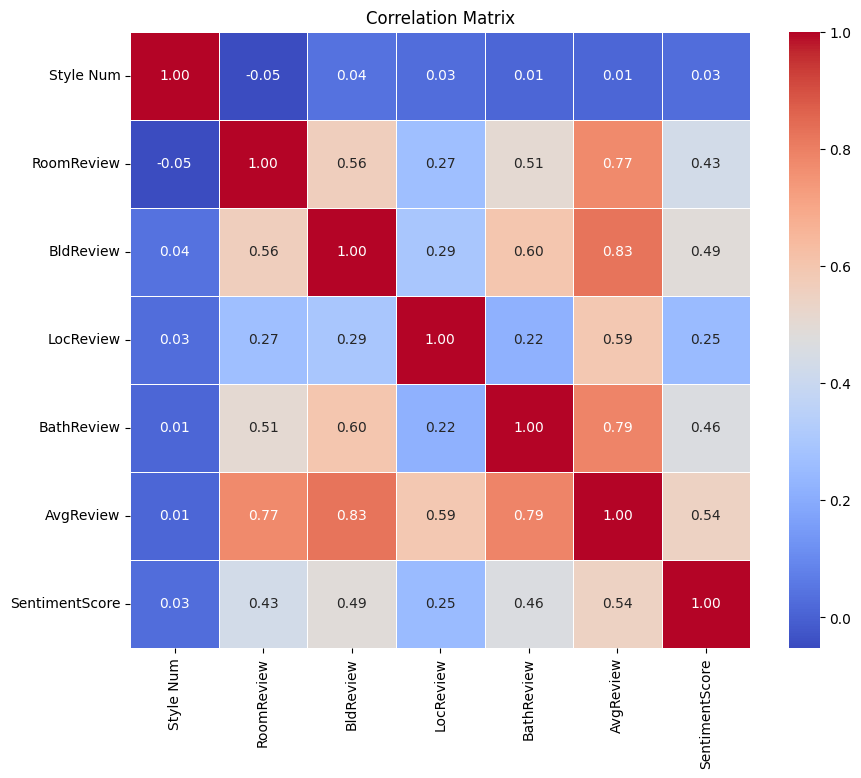

In [ ]:
# Select the specified variables
style_mapping = {'single': 1, 'double': 2, 'triple': 3, 'quad': 4, 'suite': 5, 'other': 5}
db['Style Num'] = db['Style'].map(style_mapping)
print(db)
selected_variables = ['Style Num', 'RoomReview', 'BldReview', 'LocReview', 'BathReview', 'AvgReview', "SentimentScore"]
selected_df = db[selected_variables]

# Create a correlation matrix
correlation_matrix = selected_df.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

**Explanation**: This is a correlation matrix for the important variables of what constitutes a good dorm. As it is seen here on this heat map. An important thing to note on this map for the variables is that the building review and the bathroom review have a decent correlation with one another. Looking further at the heat map, we can also see that the location review did not necessarily have much of correlation with any of the other variables. Looking further, we can see that the building review has the most association with all the other variables aside from the average review which is calculated by averaging the reviews of the variables, Bathreview, LocReview, RoomReview, and BldReview. Unsurprisingly, the average review has the highest correlation with all the other variables given that it is the average of all the reviews together for a particular dorm.

Mean SentimentScore for Each Style:
Style Num
1.0   -0.532663
2.0    0.152276
3.0   -0.654054
4.0   -0.977778
5.0    4.000000
Name: SentimentScore, dtype: float64


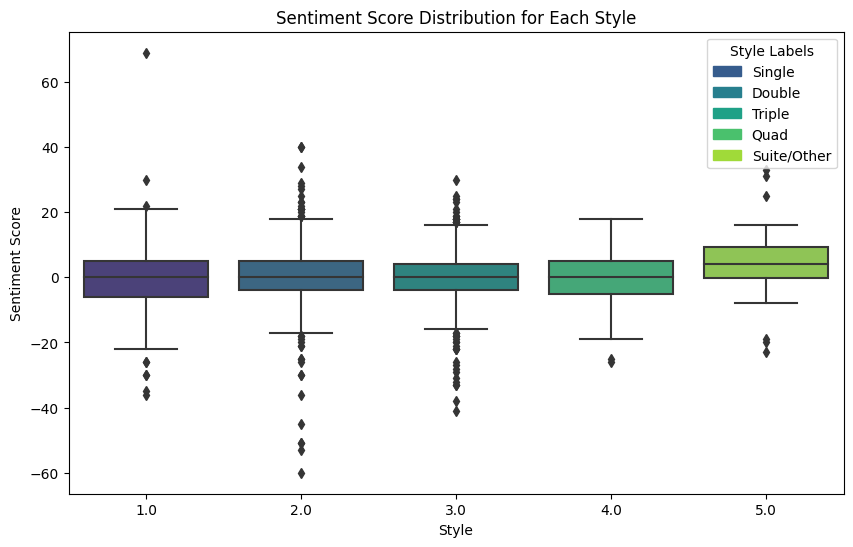

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Style Num', y='SentimentScore', data=db, palette='viridis')

# Calculate and print mean values for each style
mean_values = db.groupby('Style Num')['SentimentScore'].mean()
print("Mean SentimentScore for Each Style:")
print(mean_values)

# Set title and axis labels
plt.title('Sentiment Score Distribution for Each Style')
plt.xlabel('Style')
plt.ylabel('Sentiment Score')

# Define legend labels
legend_labels = {1: 'Single', 2: 'Double', 3: 'Triple', 4: 'Quad', 5: 'Suite/Other'}

# Add legend to the plot
handles = [plt.Rectangle((0, 0), 1, 1, color=sns.color_palette('viridis')[i], label=label) for i, label in legend_labels.items()]
plt.legend(handles=handles, title='Style Labels')

# Display the plot
plt.show()

**Explanation**: Again, as explained before, we can see from our results that the type of a dorm does not impact how a student views a dorm room. There are equal pros and cons about all types of rooms that pan out to each type being equal. In any given dorm a student may view a "Single" dorm room better than a "Double" or the other way around.

Pearson Correlation Coefficient: 0.544809869723098
P-value: 1.8993400637316653e-101


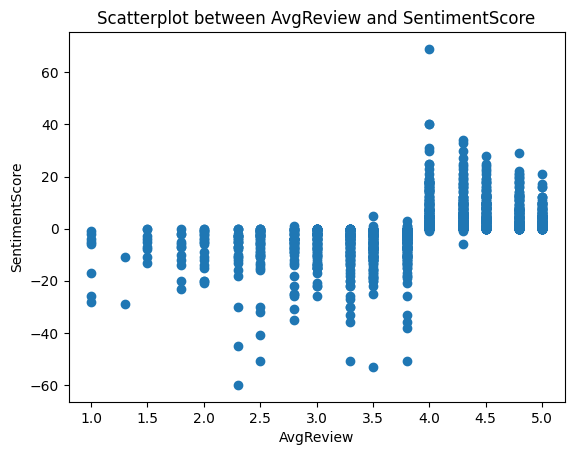

In [ ]:
corr_coefficient, p_value = pearsonr(db['AvgReview'], db['SentimentScore'])
print(f"Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Scatterplot
plt.scatter(db['AvgReview'], db['SentimentScore'])
plt.title('Scatterplot between AvgReview and SentimentScore')
plt.xlabel('AvgReview')
plt.ylabel('SentimentScore')
plt.show()

**Explanation**: We did a Pearson Correlation Test to test the correlation between the Average Review Rating and the Sentiment Score. Our calculated correlation coefficient was 0.544, so we see a decent correlation between the two varaibles. We see once you get to the 4-5 Average Review Rating range, you start to see the Sentiment Score increase dramatically signifying more positive reviews compared to the Average Review Rating range 1-3. Therefore, from these results that there is a correlation between our generated sentiment scores and the average rating for a specific dorm. Therefore, our text mining/sentiment analysis model was profficient in being able to predict how a student may feel about a dorm room based on the open-ended comment of the review.

**Importance of Predictive Modeling to Predict Sentiment Scores**

The reason why being able to predict the sentiment score of a dorm review based on its other ratings is because we will be able to generally predict what rating a person may give a certain dorm. For example, if we have pictures of a dorm. We can rate each feature of it out of 5 based on how each feature looks and feels. Based on these ratings, we can generate an overall consensus of how the general public will view the dorm based on its predicted sentiment score. If the predicted sentiment score based on our own ratings is negative, then we can say that the general public will view the dorm as a bad dorm. On the other hand, if the predicted sentiment score is positive, then we can say that the general public will view the dorm as a good dorm. Classifying these dorm's as a satisfactory or unsatisfactory will give insights that designers and construction architects need to build better and safe dorms for students. Not only will this be the case, but designers and architects will be able to build better houses and other living conditions for people.

KNN Regression Technique: **Supervised Learning** - Model Predicts a Dorm's Sentiment Score Based on the Average Review Score

                        College       Community   Style  RoomReview  \
0                  UC Riverside  Pentland Hills  triple           4   
1                  UC Riverside  Pentland Hills   suite           4   
2                  UC Riverside  Pentland Hills  double           3   
3                  UC Riverside  Pentland Hills  double           5   
4                  UC Riverside  Pentland Hills  triple           4   
..                          ...             ...     ...         ...   
796   San Jose State University   Joe West Hall  triple           2   
797   San Jose State University   Joe West Hall  double           2   
798   San Jose State University   Joe West Hall  single           3   
799   San Jose State University             CVC   suite           5   
800  San Diego State University          Olmeca  triple           3   

     BldReview  LocReview  BathReview  AvgReview  \
0            4          2           4        3.5   
1            3          4           5      

<ipython-input-53-79eb8dbfbdde>:38: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  review_train.loc[k_nearest].mean()


<Axes: xlabel='AvgReview', ylabel='SentimentScore'>

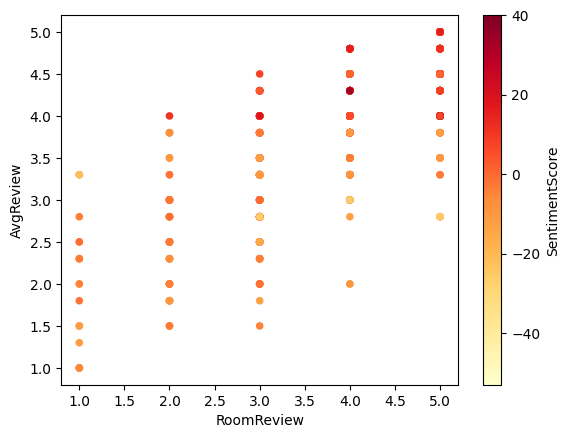

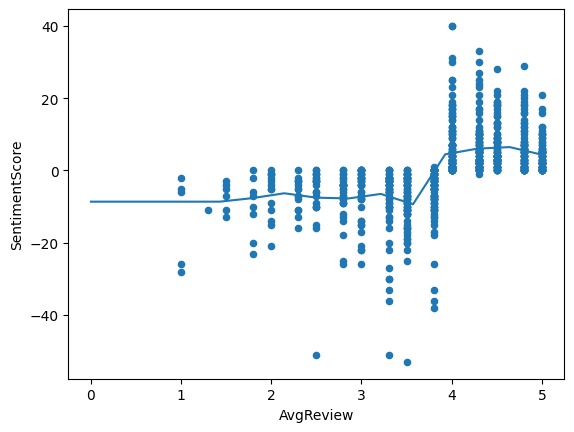

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay

#Got this algorithm from lab materials provided on canvas

reviewDB = db

review_train = reviewDB.loc[:800].copy()
review_test = reviewDB.loc[801:].copy()

print(review_train)

review_train.plot.scatter(x = "RoomReview", y = "AvgReview", c = "SentimentScore", cmap = cm.YlOrRd)

X_train = review_train[["RoomReview", "AvgReview"]]
Y_train = review_train["SentimentScore"]

X_train_mean = X_train.mean()
X_train_sd = X_train.std()
X_train_st = (X_train - X_train_mean) / X_train_sd

x_new = review_test.loc[806, ["RoomReview", "AvgReview"]]

x_new_st = (x_new - X_train_mean) / X_train_sd
x_new_st

distance = np.sqrt(((X_train_st - x_new_st) ** 2).sum(axis = 1))
distance

k_nearest = distance.sort_values().index[:5]
k_nearest

review_train.loc[k_nearest].mean()

X_trainG = review_train[["AvgReview"]]
Y_trainG = review_train["SentimentScore"]
X_testG = review_test[["AvgReview"]]
Y_testG = review_test["SentimentScore"]
model = KNeighborsRegressor(n_neighbors=28)
model.fit(X = X_trainG, y = Y_trainG)

X_newG = pd.DataFrame()
X_newG["AvgReview"] = np.linspace(0, 5, num=15)
y_new_G = pd.Series(
    model.predict(X_newG),
    index=X_newG["AvgReview"]
)

review_train.plot.scatter(x = "AvgReview", y = "SentimentScore")
y_new_G.plot.line()

**Explanation**: **Supervised Learning Technique** - We were then able to create a model that is able to predict the overall sentiment score of a review based on the average score that a reviewer gave to a dorm. We used a KNN model as we chose a k-value of the 28 nearest neighbors out of a test sample of 800 reviews. Our model is accurate because it does not have too much bias since it does not use one specific function to classify the data. The model is flexible as per the data that it is predicting. The model also does not have too much variance as the model does not strictly follow the test data and instead generalized the direction of the data. Overall, the KNN model performed best with a k-value of 28 and was able to accurately predict the direction of sentiment of reviews for a dorm based on its average review score.

K-Means **Unsupervised Learning** - Clustering Predictive Model



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.4353287652740765


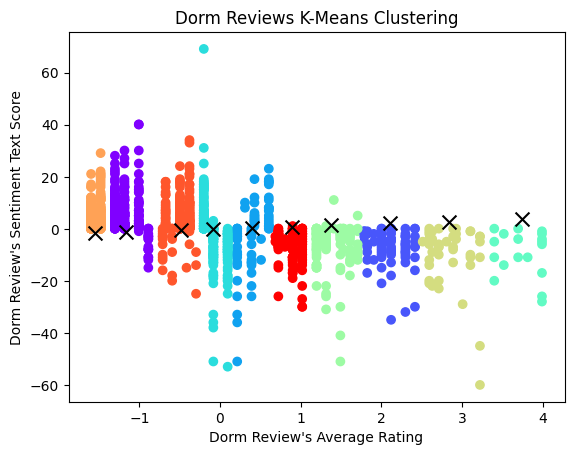

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

#Got this algorithm from lab 8 materials provided on canvas

kMeansRevDB = db
X = db[["AvgReview", "RoomReview"]]
Y = db[["SentimentScore"]]

pca = PCA(n_components = 1)
X_pca = pca.fit_transform(X)
Y_pca = pca.fit_transform(Y)
X_pca

kmeans = KMeans(n_clusters = 10, random_state = 42)

kmeans.fit(X_pca, Y_pca)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

silhouette_avg = silhouette_score(X_pca, labels) + silhouette_score(Y_pca, labels)
print(f"Silhouette Score: {silhouette_avg}")

plt.scatter(X_pca[:, 0], Y_pca[:, 0], c=labels, cmap="rainbow", alpha=1)
plt.scatter(centroids[:, 0], centroids[:, 0], marker="x", s=100, c="black")
plt.title("Dorm Reviews K-Means Clustering")
plt.xlabel("Dorm Review's Average Rating")
plt.ylabel("Dorm Review's Sentiment Text Score")
plt.show()

**Conclusion/Results:** In this project we aimed to analyze a database of college dorm reviews from all universities in California and some Ivy League universities. Our goal was to use the comments of each review of each dorm to give each dorm review a sentiment score as well as figure out what features of dorms had the most correlation with the average review of the dorm. Beyond this, our goal was to figure out if there was a strong correlation with the building score and the bathroom score of a review as those features went hand in hand with one another and whether or not features like the bathroom and the location had the highest correlations with the average review. This sentiment score indicates how a particular student viewed the dorm. If the student was not satisfied by the dorm, the sentiment score would be negative. On the other hand, if the student was satisfied by the dorm, the sentiment score would be positive. After running pearson correlation and chi-squared tests on the correlation between the sentiment score and the dorm's average rating, we found that there was a positive correlation between the two. This meant that the better a dorm was, the higher sentiment score that would be given from our model. Since, intuitively we know that the reviewers/student's view on the dorm should increase based on how well-rated the dorm is, we can say that our sentiment analysis model was accurate in depicting the sentiment of the student's dorm review. We were also able to analyze the correlation of different features with one another in terms of their ratings by using a correlation matrix. The creation of this model allowed us to visualize how closely correlated certain features are with one another in terms of review. While looking at the model, we correctly predicted that there is a strong correlation with the bathroom rating and the rating of the building. Furthermore, we interestingly found that the rating of the bathroom and locations were not the highest correlated features with the average rating. To our surprise, the location review had the lowest correlation with the average review. Instead, we found that it was the building review which had the highest correlation with the average review and that the bathroom review had the second highest correlation with the average review. Knowing which features have the highest correlation with the average review is important as it will allow future architects of dorms to better think about focusing on the quality of certain features that students find more important than others. Next, we were able to create two models that were accurately able to predict a reviews sentiment without the student's text-based comment on the dorm. Instead we were able to predict the sentiment based on how the student rated the dorm. Viewing our results from the silhouette score of the k-means clustering model, we created a profficient model that accurately predicts the dorm room's sentiment based on the cluster it falls to from its features and ratings. This prediction is important because if an architect for college dorm rooms can rate their design through the listed features in our dataset, then the architect themselves will be able to see how the general view/sentiment of the student will be by seeing the dorm room. Using this insight, the architect will be able to create higher quality dorms for university students. Overall, we were able to analyze and create a model that could help future architects design and build higher quality dorm room's for university students.


**Explanation**: **Unsupervised Learning Technique** - We also used K-Means clustering to double down on our predictive modeling, to create a model that can predict a dorm room reviews sentiment score, based on its ratings of features such as the bathroom, the room, and the location. In this model, if we are given a new dorm, we will see which cluster that dorm review falls into based on its other ratings. We will then be able to take the mean of its 10 nearest neighbors to predict its sentiment score. Our results showed that the silhouette score is about 0.43. This is a good score it is far from -1 and closer to 1 which means that the clusters and the cluster centers accurately describe the data set. Therefore from these results, the k-means clustering predictive model is profficient in predicting how a student will feel about a particular dorm based on its other ratings and features.